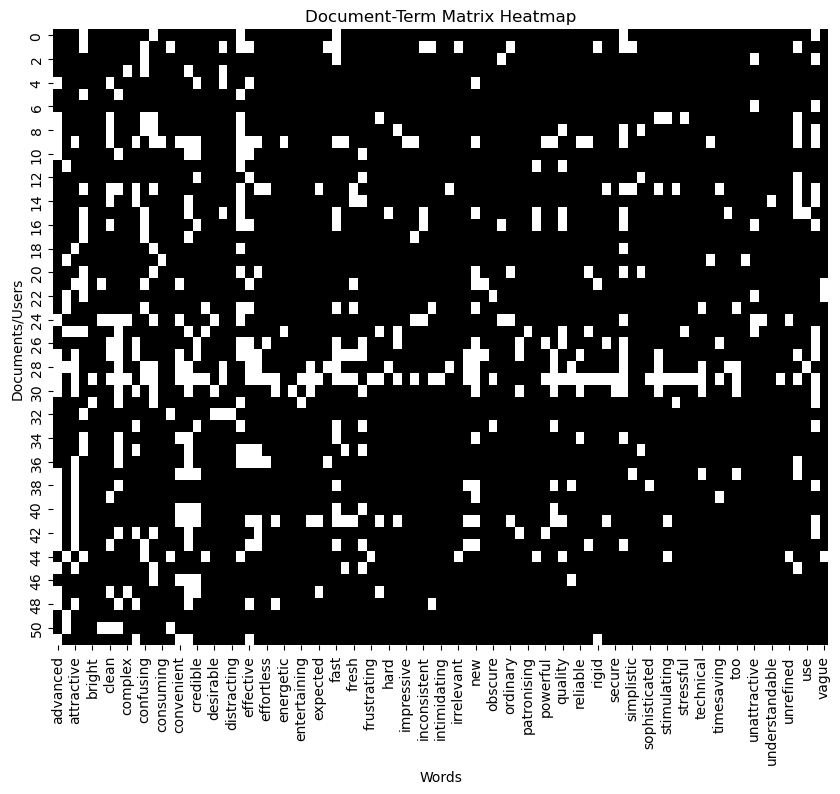

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import networkx as nx
import community as community_louvain

# Import the CSV file into a pandas DataFrame
url = "https://raw.githubusercontent.com/marsgr6/estadistica-ux/main/data/words_ux.csv"
df = pd.read_csv(url)


# Combine words in each row into a single document
df['document'] = df['Words'].apply(lambda x: ' '.join(x.split(',')))

# Create a CountVectorizer object
vectorizer = CountVectorizer()


# Fit the vectorizer to the documents and transform them into a document-term matrix
dtm = vectorizer.fit_transform(df['document'])


# Convert the document-term matrix to a pandas DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(dtm_df, cmap="gray", annot=False, cbar=False)  # Updated cmap and cbar
plt.title("Document-Term Matrix Heatmap")
plt.xlabel("Words")
plt.ylabel("Documents/Users")
plt.show()

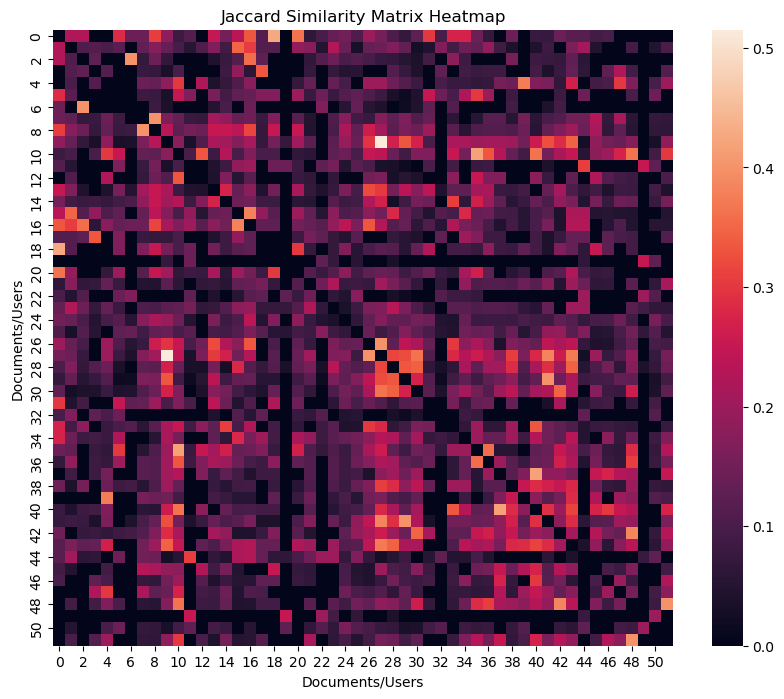

In [2]:
# Calculate Jaccard similarity matrix
num_docs = dtm_df.shape[0]
jaccard_matrix = np.zeros((num_docs, num_docs))

for i in range(num_docs):
    for j in range(i + 1, num_docs):
        jaccard_matrix[i, j] = jaccard_score(dtm_df.iloc[i], dtm_df.iloc[j], average='binary')  # average='binary' for presence/absence
        jaccard_matrix[j, i] = jaccard_matrix[i, j]  # Ensure symmetry

# Visualize similarity matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_matrix, annot=False)  # Set annot=False
plt.title("Jaccard Similarity Matrix Heatmap")
plt.xlabel("Documents/Users")
plt.ylabel("Documents/Users")
plt.show()

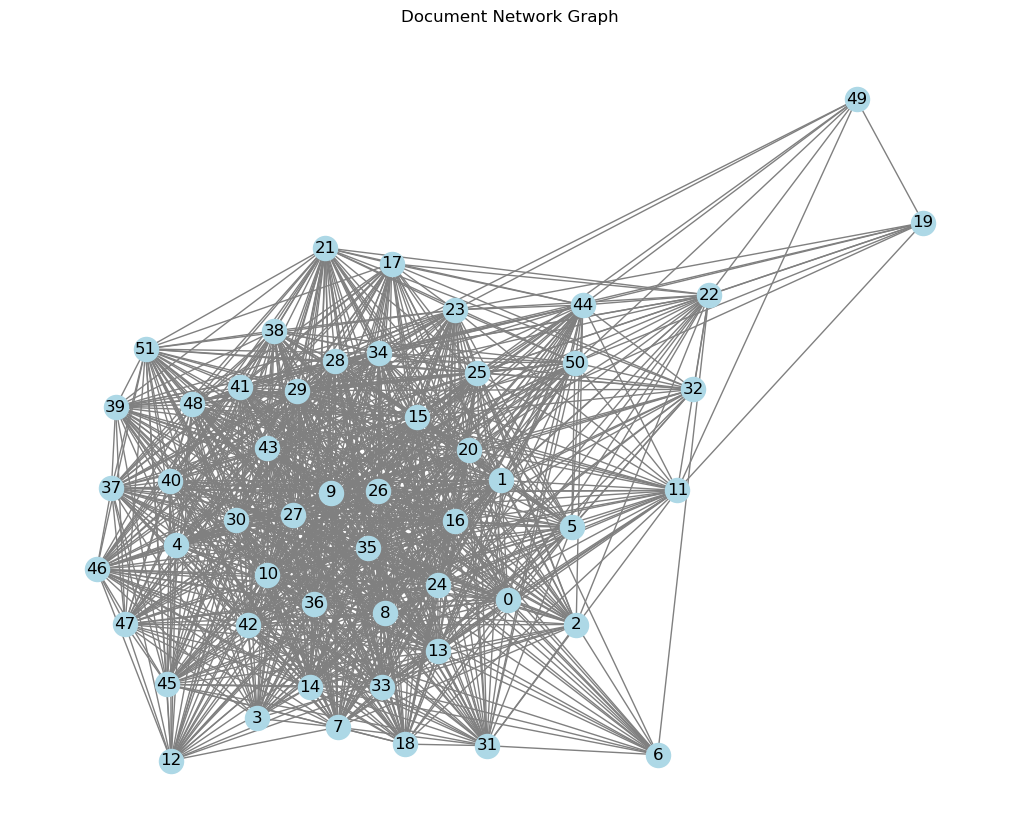

In [3]:
# Create a graph object
graph = nx.Graph()

# Add nodes (documents) to the graph
num_docs = jaccard_matrix.shape[0]
graph.add_nodes_from(range(num_docs))

# Add edges based on similarity matrix
for i in range(num_docs):
    for j in range(i + 1, num_docs):
        if jaccard_matrix[i, j] > 0:  # Connect if similarity is greater than 0
            graph.add_edge(i, j, weight=jaccard_matrix[i, j])

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(graph, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("Document Network Graph")
plt.show()

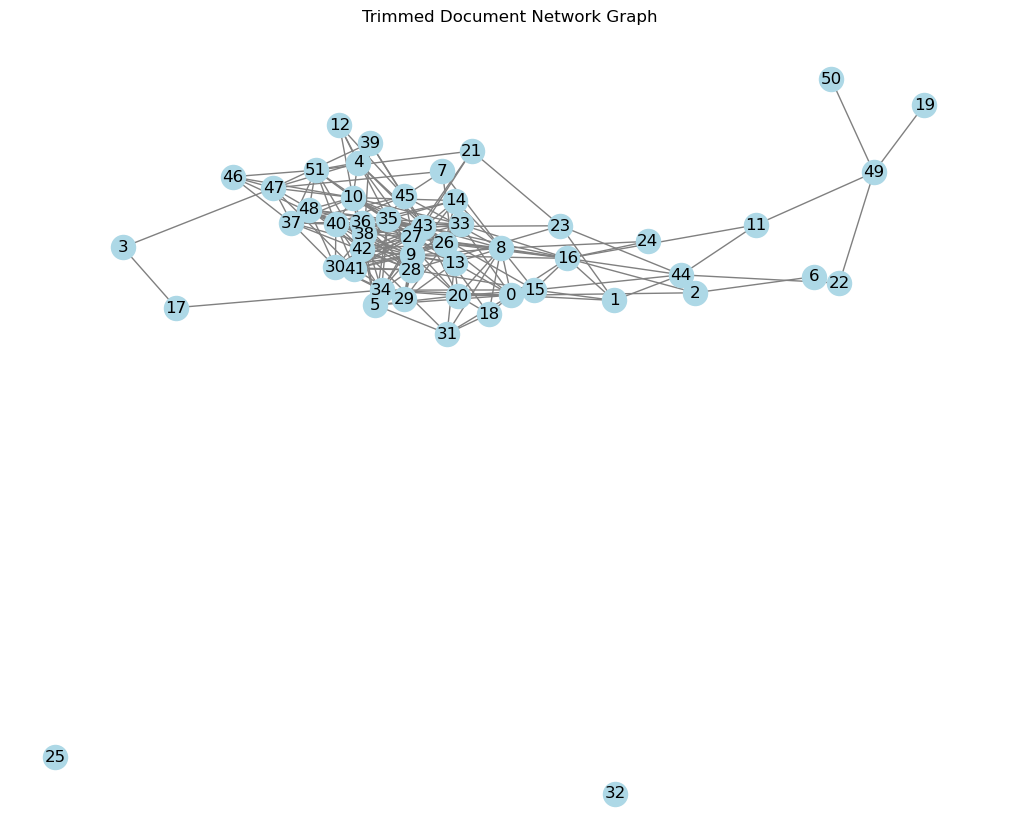

In [6]:
# Define threshold for trimming edges
threshold = 0.2  # Adjust this value as needed

# Remove edges below the threshold
edges_to_remove = [(u, v) for u, v, data in graph.edges(data=True) if data['weight'] < threshold]
graph.remove_edges_from(edges_to_remove)

# Visualize the trimmed graph
plt.figure(figsize=(10, 8))
nx.draw(graph, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("Trimmed Document Network Graph")
plt.show()

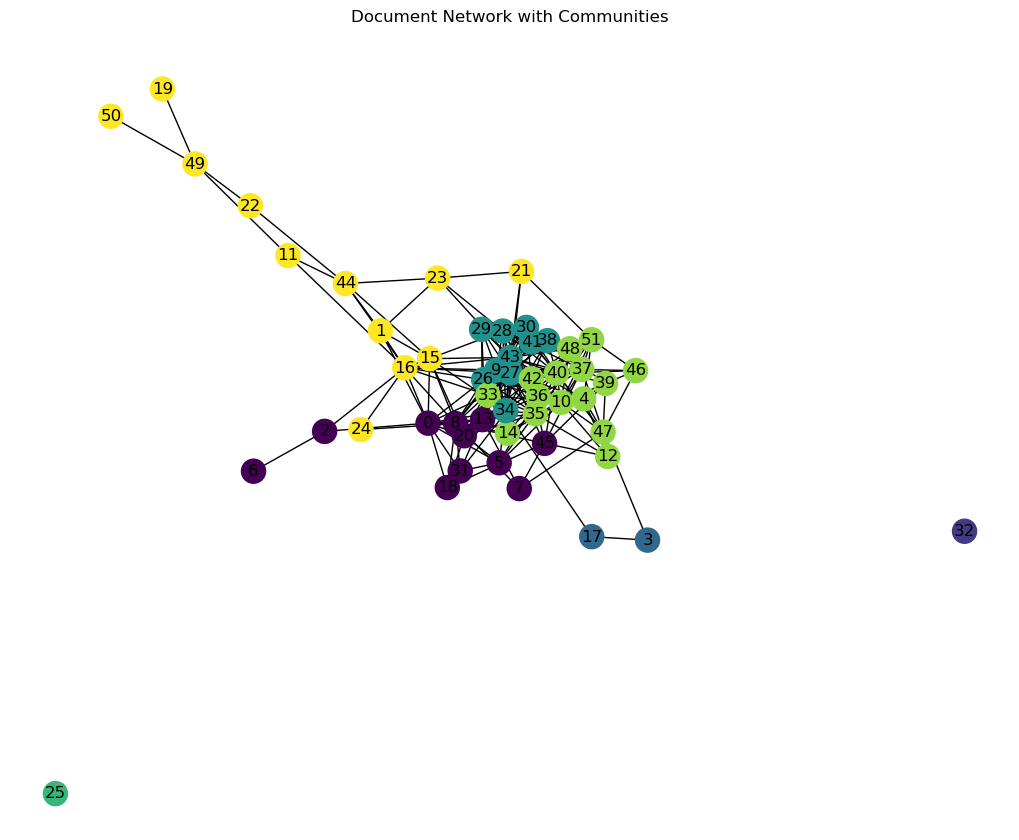

Community 0: [0, 2, 5, 6, 7, 8, 13, 18, 20, 31, 45]
Community 1: [32]
Community 2: [3, 17]
Community 3: [9, 26, 27, 28, 29, 30, 34, 38, 41, 43]
Community 4: [25]
Community 5: [4, 10, 12, 14, 33, 35, 36, 37, 39, 40, 42, 46, 47, 48, 51]
Community 6: [1, 11, 15, 16, 19, 21, 22, 23, 24, 44, 49, 50]


In [7]:
# Apply Louvain Modularity algorithm
partition = community_louvain.best_partition(graph)

# Visualize the graph with communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph)  # Adjust layout as needed
nx.draw(graph, pos, with_labels=True, node_color=[partition[node] for node in graph.nodes()], cmap="viridis")
plt.title("Document Network with Communities")
plt.show()

# Print community structure
for community_id in set(partition.values()):
    print(f"Community {community_id}: { [node for node in partition if partition[node] == community_id] }")

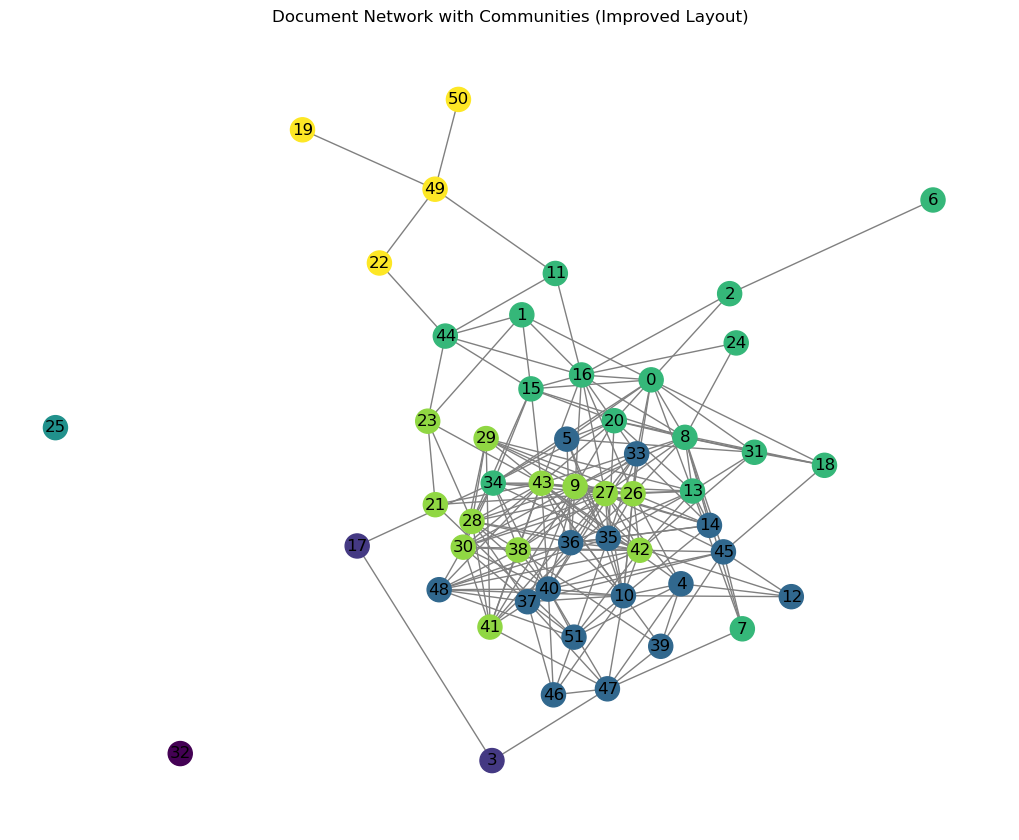

In [8]:
# Apply Louvain Modularity algorithm
partition = community_louvain.best_partition(graph)

# Get community colors
community_colors = [partition[node] for node in graph.nodes()]

# Visualize the graph with communities using a better layout
plt.figure(figsize=(10, 8))

# Choose a layout algorithm (experiment with different options)
# pos = nx.spring_layout(graph, k=0.3, iterations=50)  # Adjust k and iterations
pos = nx.kamada_kawai_layout(graph)  # Another layout option
# pos = nx.circular_layout(graph)  # Another layout option

nx.draw(graph, pos, with_labels=True, node_color=community_colors, cmap="viridis", edge_color="gray")
plt.title("Document Network with Communities (Improved Layout)")
plt.show()